Bohao Hu #33131277
Leanne Su #55285753 
Grady Chen #18865568

In [4]:
import numpy as np
import math
import matplotlib.pyplot as plt

def grav_acc(s_x, s_y, planet_mass):
    '''
    takes in x,y components of position vector from the planet and mass of planet
    finds acceleration components

    input: s_x, s_y, planet_mass
    output: a_x (m/s), a_y (m/s)
    '''
    s = math.sqrt(s_x**2 + s_y**2)
    #formula for a is GMp/s^2
    big_G = 6.67e-11
    a = (big_G*planet_mass)/(s**2)

    sin_beta = -(s_x)/s
    cos_beta = -(s_y)/s

    a_x = a * sin_beta
    a_y = a * cos_beta

    return(a_x, a_y)

def checkinit(s_x0, s_y0, v_x0, v_y0, planet_radius):
    s = math.sqrt(s_x0**2 + s_y0**2)
    if np.abs(s) <= planet_radius:
        raise ValueError('Please enter coordinates that are above the planetary surface i.e greater than the radius.')
    elif v_y0 < 0:
        raise ValueError('Please enter a positive velocity, in the direction towards the planet.')
    else:
        pass
    
def sc_vel_pos_change(a_x, a_y, v_x, v_y, time_step): 
    dv_x = a_x * time_step
    dv_y = a_y * time_step
    
    ds_x = v_x * time_step + 0.5*a_x*(time_step)**2
    ds_y = v_y * time_step + 0.5*a_y*(time_step)**2
    
    return ds_x, ds_y, dv_x, dv_y

def get_traj(s_x0, s_y0, v_x0, v_y0, time_step, total_time, planet_mass, planet_radius):
    total_steps = int(total_time/time_step) + 1
    
    time = np.linspace(0, total_time, total_steps)
    
    acc = np.ones((time.size, 2))*np.nan
    vel = np.ones((time.size, 2))*np.nan
    pos = np.ones((time.size, 2))*np.nan
    
    checkinit(s_x0, s_y0, v_x0, v_y0, planet_radius)
        
    pos[0, 0] = s_x0
    pos[0, 1] = s_y0
    vel[0, 0] = v_x0
    vel[0, 1] = v_y0
    acc[0, 0], acc[0, 1] = grav_acc(pos[0, 0], pos[0, 1], planet_mass)

    for i in range(1, len(time)):

        a_x, a_y = grav_acc(pos[i-1, 0], pos[i-1, 1], planet_mass)
        
        acc[i, 0] = a_x 
        acc[i, 1] = a_y 
        
        ds_x, ds_y, dv_x, dv_y = sc_vel_pos_change(a_x, a_y, vel[i-1, 0], vel[i-1, 1], time_step)
        
        vel[i, 0] = vel[i-1, 0] + dv_x
        vel[i, 1] = vel[i-1, 1] + dv_y
        pos[i, 0] = pos[i-1, 0] + ds_x
        pos[i, 1] = pos[i-1, 1] + ds_y
        
    return time, acc, vel, pos

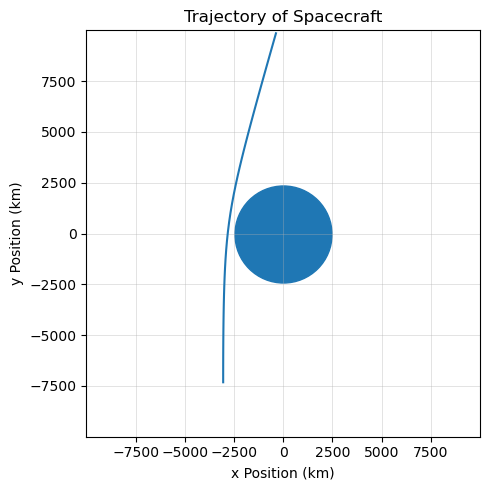

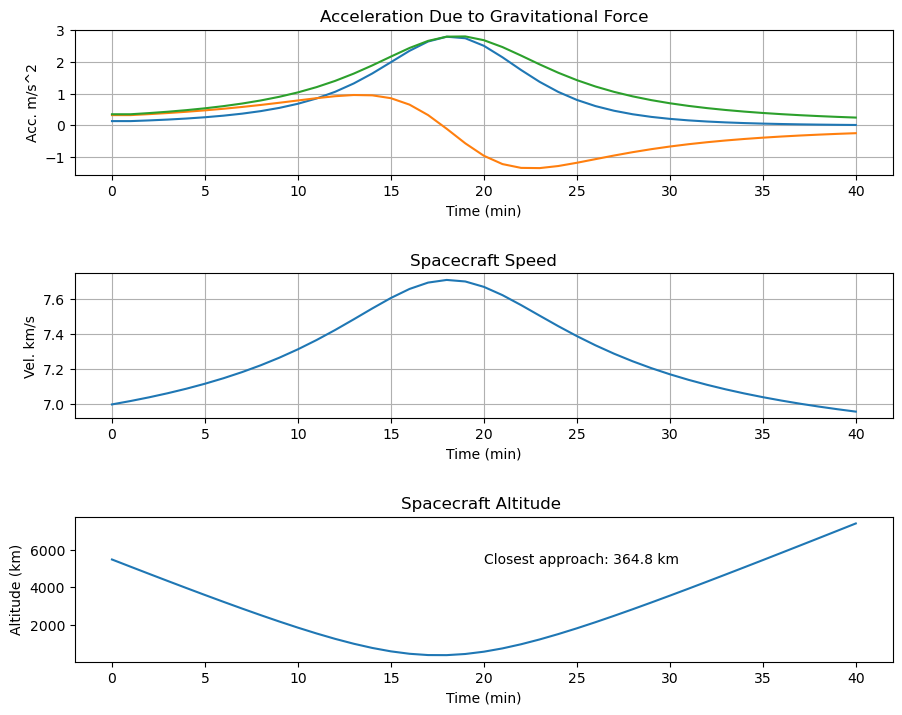

In [6]:
#DELETE THIS WHEN SUBMITTING?

v_x0 = 0 #(m/s)
v_y0 = 7000 #(m/s)
time_step = 60 
total_time = 40 * 60 #(s)
planet_mass = 3.3e23 #(kg)
planet_radius = 2440*1000 #(m)
s_x0 = -3050*1000 #(m)
s_y0 = -3*planet_radius #(m)

def mag(x, y):
    arr = np.ones(len(x)) * np.nan
    for i in range(len(x)):
        arr[i] = math.sqrt(x[i]**2 + y[i]**2)
    return arr

def find_lowest_altitude(x):
    return np.argmin(x)

time, acc, vel, pos = get_traj(s_x0, s_y0, v_x0, v_y0, time_step, total_time, planet_mass, planet_radius)
# plt.plot(pos[: , 0]/1000, pos[: , 1]/1000)
# plt.xlim(-9999, 9999)
# plt.ylim(-9999, 9999)
# plt.scatter(0, 0, marker = "o", s = 2440 * 2)
# plt.grid(True, alpha=0.5, which='both', linewidth=0.5, axis='both')
# plt.gca().set_aspect('equal', adjustable='box')

fig, ax = plt.subplots(figsize = (5, 5))
ax.plot(pos[: , 0]/1000, pos[: , 1]/1000)
ax.set_xlim(-9999, 9999)
ax.set_ylim(-9999, 9999)
ax.set_xlabel("x Position (km)")
ax.set_ylabel("y Position (km)")
ax.set_title("Trajectory of Spacecraft")
ax.grid(True, alpha=0.5, which='both', linewidth=0.5, axis='both')
ax.scatter(0, 0, marker = "o", s = planet_radius/1000 * 2)

fig2, ((ax2), (ax3), (ax4)) = plt.subplots(3, 1, figsize = (10, 8))
fig2.tight_layout(pad = 5)
ax2.plot(np.arange(time.size), acc[:, 0])
ax2.plot(np.arange(time.size), acc[:, 1])
ax2.plot(np.arange(time.size), mag(acc[:, 0], acc[:, 1]))
ax2.set_xlabel("Time (min)")
ax2.set_ylabel("Acc. m/s^2")
ax2.set_title("Acceleration Due to Gravitational Force")
ax2.grid()

ax3.plot(np.arange(time.size), mag(vel[:, 0]/1000, vel[:, 1]/1000))
ax3.set_xlabel("Time (min)")
ax3.set_ylabel("Vel. km/s")
ax3.set_title("Spacecraft Speed")
ax3.grid()

altitude = mag(pos[:, 0]/1000, pos[:, 1]/1000) - planet_radius/1000
ax4.plot(np.arange(time.size), altitude)
ax4.set_xlabel("Time (min)")
ax4.set_ylabel("Altitude (km)")
ax4.set_title("Spacecraft Altitude ")
ax4.annotate(f"Closest approach: {np.round(np.min(altitude), 1)} km", 
             (np.max(time)/120, (np.max(altitude) - np.min(altitude)) * 0.75), 
             fontsize = 10)
fig.tight_layout()